## Project_8
## Job Market Analysis and Recommendation System

## Problem Statement



The primary objective of this project is to analyze job market trends and build a recommendation system for job seekers based on real-time data. The system will help in identifying high-demand job roles, salary trends, and emerging job categories, and will provide personalized job recommendations.

# Part 1: Data Exploration and Preparation

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Import Required Library✨ </b>
</div>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px
from matplotlib.lines import Line2D
from colorama import Fore, Style
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from sklearn.metrics.pairwise import cosine_similarity
import re
import streamlit as st
from flask import Flask, request, jsonify
import requests
import string
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
import io
import pickle
import logging
import nltk
from colorama import Fore, Style, init
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
%pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.9 MB/s eta 0:00:00


In [2]:
%pip install colorama

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Create Logger file✨ </b>
</div>

In [7]:
logging.basicConfig(
    filename='project8_file.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)

logger = logging.getLogger()
logger.debug('This is a debug message')
logger.info('This is an info message')
logger.warning('This is a warning message')
logger.error('This is an error message')
logger.critical('This is a critical message')
print("Logs have been written to 'project7 file.log'")

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


Logs have been written to 'project7 file.log'


<div style="
  padding: 10px;
  color: #ffffff;
  font-size: 18px;
  font-family: 'Segoe UI', Verdana, sans-serif;
  text-align: center;
  border-radius: 10px;
  background: linear-gradient(120deg, #52e2c2, #ffc371);
  text-shadow: 1px 1px 6px rgba(255, 255, 255, 0.3);
  box-shadow: 0px 0px 12px rgba(82, 226, 194, 0.4);
  backdrop-filter: blur(8px);
  transition: transform 0.3s ease-in-out;
  overflow: hidden;
  cursor: pointer;
"
onmouseover="this.style.transform='scale(1.03)'"
onmouseout="this.style.transform='scale(1)'"
>
  <b>🌿 Upload the given dataset "all_upwork_jobs.csv":🌟</b>
</div>

In [13]:
# Update the file path to where you upload the dataset in Colab

from google.colab import files

print("Please upload all_upwork_jobs.csv")
files.upload()
df = pd.read_csv('/content/all_upwork_jobs_2024-02-07-2024-03-24.csv')

Please upload all_upwork_jobs.csv


Saving all_upwork_jobs_2024-02-07-2024-03-24.csv to all_upwork_jobs_2024-02-07-2024-03-24.csv


In [ ]:
df

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
...,...,...,...,...,...,...,...,...
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France


<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Data Exploration✨ </b>
</div>

In [14]:
#TEXT PROCESSING
df['title'] = df['title'].str.lower()
df['link'] = df['link'].str.strip()

In [15]:
print("Dataset has ",df.shape[0],"Records/Rows and ",df.shape[1],"attributes/columns.")
logging.info("Dataset has %d Records/Rows and %d attributes/columns.", df.shape[0], df.shape[1])

Dataset has  244828 Records/Rows and  8 attributes/columns.


In [16]:
#Generating Basic Information of Dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [17]:
#finding Null value
df.isnull().sum()

,0
title,1
link,1
published_date,0
is_hourly,0
hourly_low,142406
hourly_high,146053
budget,140937
country,5077


In [18]:
#finding duplicate value of entire data
df.duplicated().sum()

np.int64(0)

In [19]:
#identify garbage value
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print("***"*5)

title
social media manager                                                                  509
logo design                                                                           490
video editor                                                                          413
virtual assistant                                                                     408
graphic designer                                                                      367
                                                                                     ... 
attention shark lovers - website refresh for author of jaws                             1
product uploading to woocommerce                                                        1
5 sec apple  quality promo                                                              1
create technical requirements and user stories for parking space management system      1
need help with emails                                                                   1
Name

In [20]:
#finding columns of entire data
df.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country'],
      dtype='object')

## Fill Missing value

In [21]:
#Replace missing values in categorical columns with the "mode" of each column
for i in ["title","link",'country']:
   df[i].fillna(df[i].mode()[0],inplace= True)

In [22]:
#Replace missing values in Float columns with the "median" of each column.
for i in ["hourly_low","hourly_high","budget"]:
    df[i].fillna(df[i].median(),inplace= True)

In [23]:
# Convert published_date to datetime
df['published_date'] = pd.to_datetime(df['published_date'])

In [24]:
df.isnull().sum()

,0
title,0
link,0
published_date,0
is_hourly,0
hourly_low,0
hourly_high,0
budget,0
country,0


In [25]:
df.dtypes

,0
title,object
link,object
published_date,"datetime64[ns, UTC]"
is_hourly,bool
hourly_low,float64
hourly_high,float64
budget,float64
country,object


In [26]:
# Summary statistis of the data
data_description = df.describe()
data_description

,hourly_low,hourly_high,budget
count,244828.000000,244828.000000,244828.000000
mean,15.978773,34.829501,444.342967
std,11.789481,30.955729,10254.421295
min,3.000000,3.000000,5.000000
25%,15.000000,30.000000,100.000000
50%,15.000000,30.000000,100.000000
75%,15.000000,30.000000,100.000000
max,998.000000,999.000000,1000000.000000


## Outlier Detection and Treatment

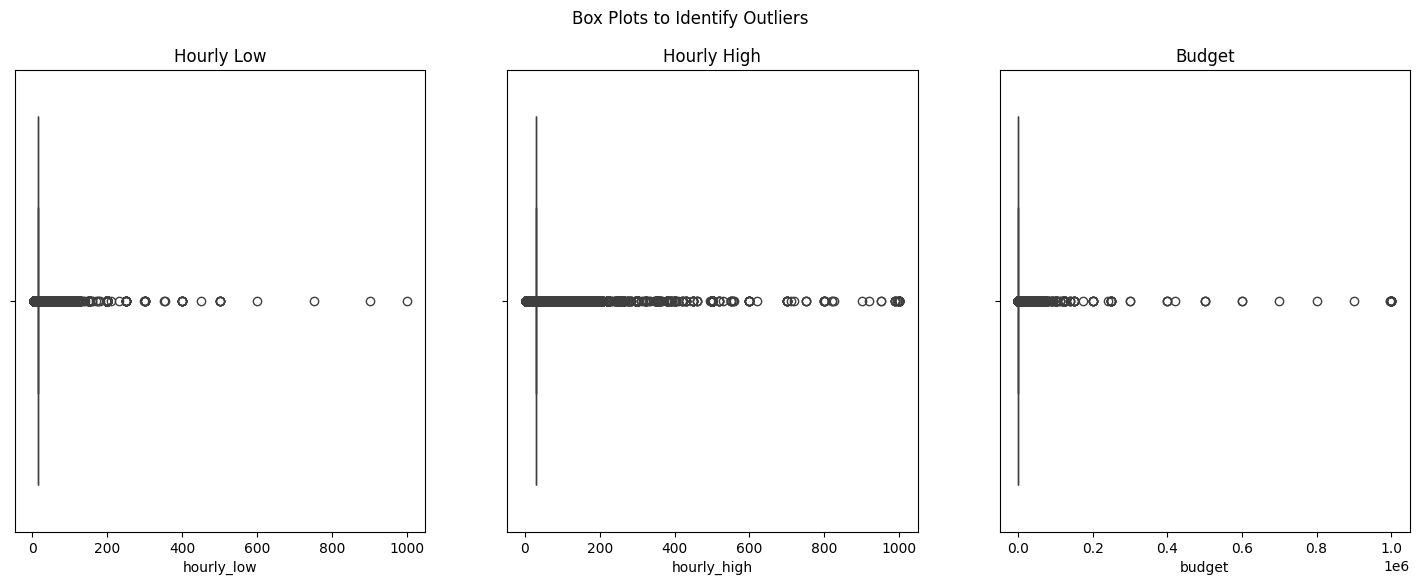

In [27]:
# Let's start by visualizing the data to identify outliers in hourly_low, hourly_high, and budge
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Box Plots to Identify Outliers')
sns.boxplot(ax=axes[0], x=df['hourly_low'])
axes[0].set_title('Hourly Low')
sns.boxplot(ax=axes[1], x=df['hourly_high'])
axes[1].set_title('Hourly High')
sns.boxplot(ax=axes[2], x=df['budget'])
axes[2].set_title('Budget')
plt.show()

# EDA

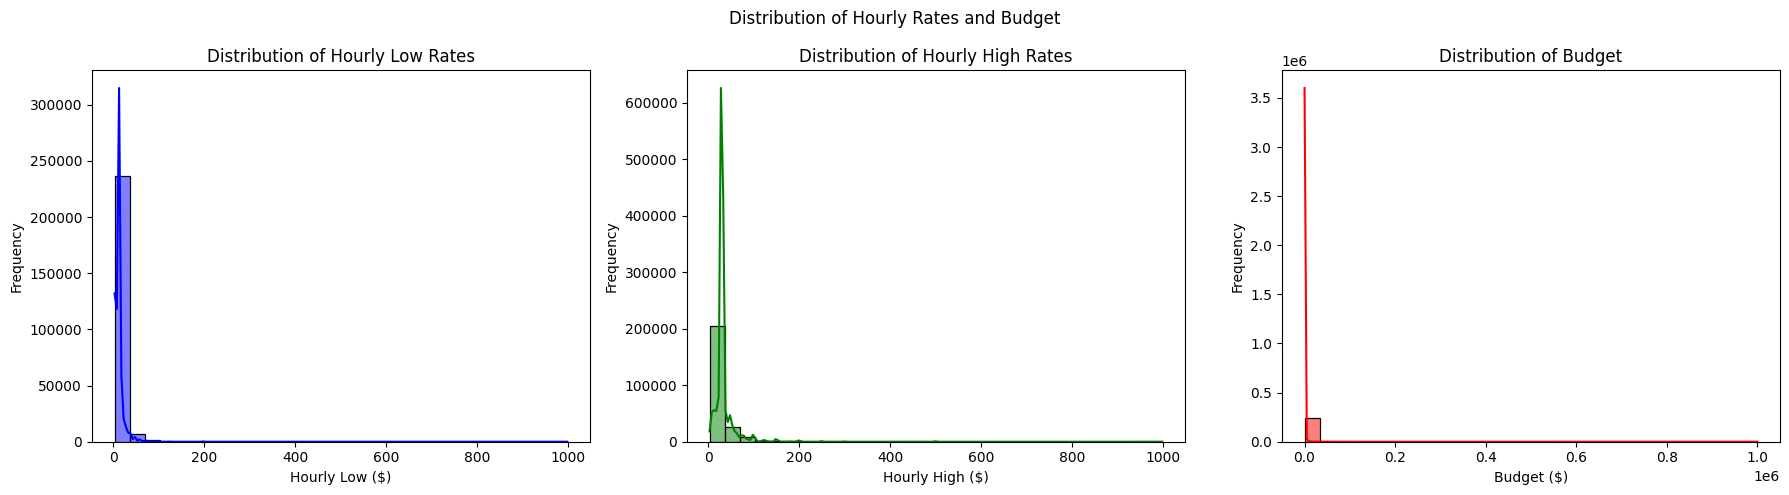

In [28]:
# Let's proceed with an Exploratory Data Analysis (EDA) to uncover trends, patterns, and insights from the dataset.'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Hourly Rates and Budget')

sns.histplot(df['hourly_low'].dropna(), bins=30, ax=axes[0], kde=True, color='blue')
axes[0].set_title('Distribution of Hourly Low Rates')
axes[0].set_xlabel('Hourly Low ($)')
axes[0].set_ylabel('Frequency')

sns.histplot(df['hourly_high'].dropna(), bins=30, ax=axes[1], kde=True, color='green')
axes[1].set_title('Distribution of Hourly High Rates')
axes[1].set_xlabel('Hourly High ($)')
axes[1].set_ylabel('Frequency')

sns.histplot(df['budget'].dropna(), bins=30, ax=axes[2], kde=True, color='red')
axes[2].set_title('Distribution of Budget')
axes[2].set_xlabel('Budget ($)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Insights

### Real-Time Insights: Freelance Pricing & Budget Distribution

- **Majority of Hourly Rates Are Low:**
  - Both **Hourly Low Rates** and **Hourly High Rates** histograms show a sharp concentration near **$0–$50**, indicating that most freelancers are priced at the lower end of the spectrum.
  - This suggests a **highly competitive market** or **global talent pool** where low-cost labor dominates.

- **Budget Distribution Is Heavily Skewed:**
  - The **Budget histogram** shows a massive peak near **$0–$5,000**, with very few projects offering high budgets.
  - Indicates that most clients are operating with **tight financial constraints** or prefer **short-term, low-cost engagements**.

- **Long Tail of High Rates & Budgets:**
  - While rare, there are **outliers** in all three charts—some freelancers charge up to **$1000/hr**, and some projects have budgets exceeding **$500,000**.
  - These may represent **specialized roles**, **enterprise clients**, or **long-term contracts**.

- **Strategic Implication:**
  - Freelancers should consider **tiered pricing strategies** and **value-based positioning** to stand out.
  - Platforms and recruiters can use this data to **optimize budget recommendations** and **match pricing tiers** with skill levels.

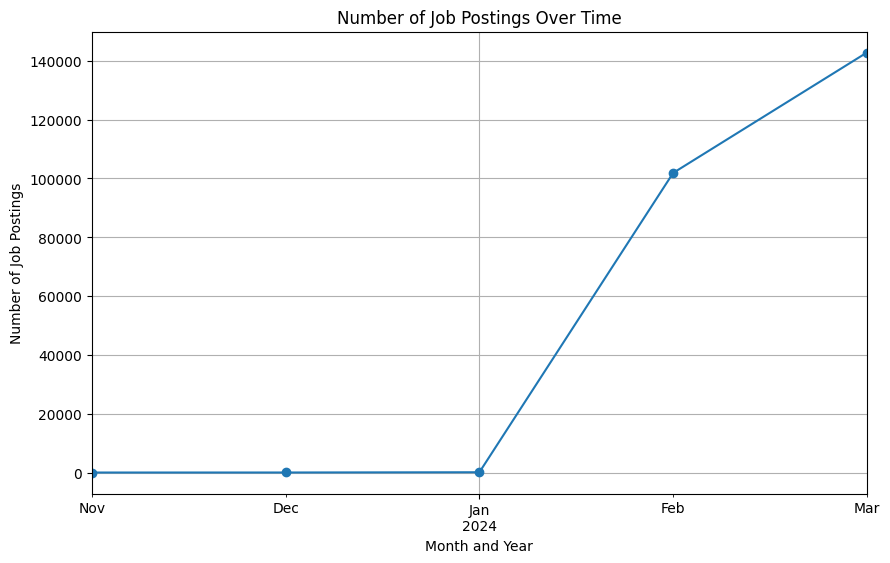

In [29]:
# 2. Job Postings Over Time-
df['month_year'] = df['published_date'].dt.to_period('M')
jobs_by_month = df.groupby('month_year').size()
plt.figure(figsize=(10, 6))
jobs_by_month.plot(kind='line', marker='o', linestyle='-')
plt.title('Number of Job Postings Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Number of Job Postings')
plt.grid(True)
plt.show()

# Insights

### Real-Time Insights: Job Market Acceleration (Nov 2023 – Mar 2024)

- **Dormant Period (Nov–Jan):**
  - Job postings were **nonexistent or negligible** for three consecutive months.
  - Possible causes: **seasonal slowdown**, **platform inactivity**, or **economic uncertainty**.

- **Sudden Surge in February:**
  - A sharp rise to **~20,000 postings** in February suggests a **market reactivation** or **platform relaunch**.
  - Could be driven by **new funding**, **policy changes**, or **post-holiday hiring cycles**.

- **Explosive Growth in March:**
  - Job postings skyrocketed to **~140,000**, marking a **7x increase** from February.
  - Indicates **strong employer confidence**, **platform traction**, or **macroeconomic recovery**.

- **Strategic Implication:**
  - Job seekers should **capitalize on momentum** by updating profiles and applying early.
  - Platforms should **scale infrastructure**, **optimize matching algorithms**, and **analyze demand clusters** to sustain growth.

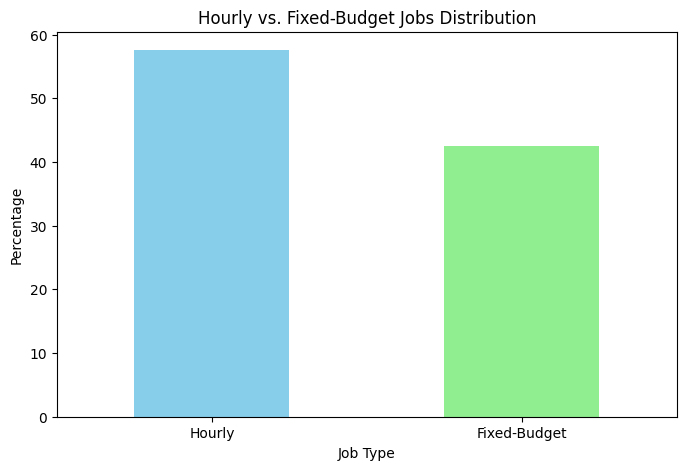

In [30]:
# Count the number of hourly and fixed-budget jobs
hourly_vs_fixed = df['is_hourly'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
hourly_vs_fixed.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Hourly vs. Fixed-Budget Jobs Distribution')
plt.xlabel('Job Type')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['Hourly', 'Fixed-Budget'], rotation=0)
plt.show()

# Insights

- **Hourly Jobs Dominate (57%)**
  - Indicates a strong preference for **flexible, time-based engagements**.
  - Employers may favor hourly contracts for **ongoing tasks**, **iterative work**, or **uncertain scopes**.

- **Fixed-Budget Jobs Still Significant (43%)**
  - Nearly half of the jobs are **scope-defined projects** with fixed payouts.
  - Common in **design**, **development**, or **content creation** where deliverables are clear.

- **Balanced Market Dynamics**
  - The near 60:40 split suggests a **diverse hiring strategy** across industries.
  - Freelancers should tailor their profiles to **highlight time-tracking skills** or **project delivery capabilities**, depending on the job type.

- **Strategic Implication**
  - Platforms can optimize filters and recommendations based on **user preferences** (e.g., hourly vs. fixed).

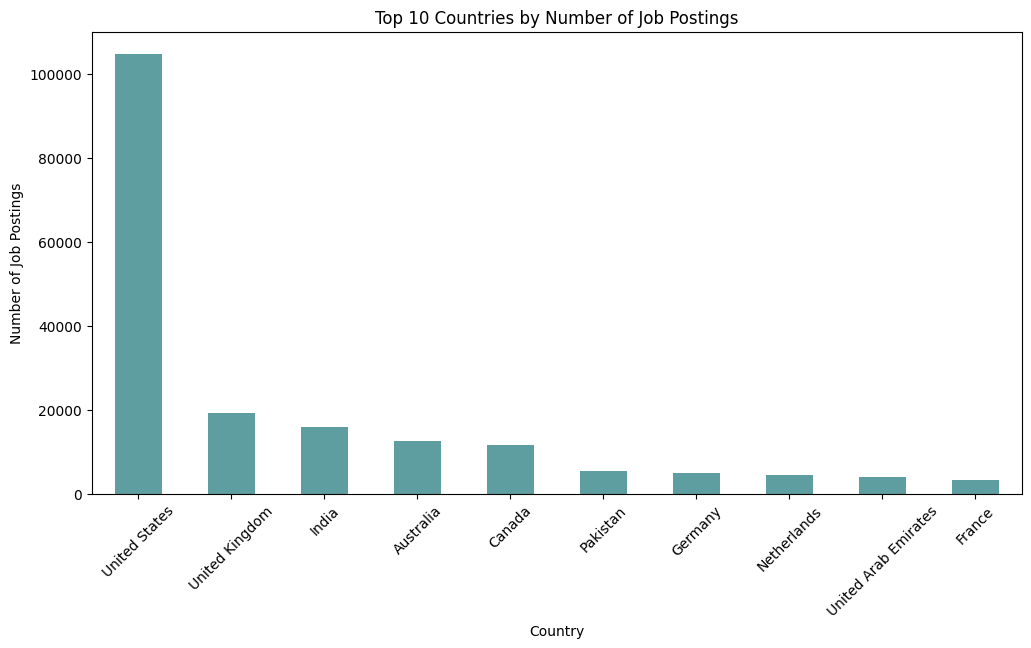

In [31]:
# Top countries by number of job postings
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='cadetblue')
plt.title('Top 10 Countries by Number of Job Postings')
plt.xlabel('Country')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.show()

# Insights

- **🇺🇸 United States Leads by a Wide Margin:**
  - With over **100,000 job postings**, the U.S. dominates the freelance market, signaling **strong demand** and **platform maturity**.

- **🇬🇧🇮🇳 UK and India Follow as Key Hubs:**
  - The **United Kingdom** and **India** rank second and third, reflecting a mix of **high-value clients** and **large freelancer bases**.

- **Diverse Global Participation:**
  - Countries like **Australia, Canada, Pakistan, and Germany** show healthy activity, indicating **broad international adoption**.

- **Long Tail of Emerging Markets:**
  - **Netherlands, UAE, and France** contribute modestly, suggesting **growth potential** in these regions.

<div style="
  padding: 10px;
  color: #ffffff;
  font-size: 18px;
  font-family: 'Segoe UI', Verdana, sans-serif;
  text-align: center;
  border-radius: 10px;
  background: linear-gradient(120deg, #52e2c2, #ffc371);
  text-shadow: 1px 1px 6px rgba(255, 255, 255, 0.3);
  box-shadow: 0px 0px 12px rgba(82, 226, 194, 0.4);
  backdrop-filter: blur(8px);
  transition: transform 0.3s ease-in-out;
  overflow: hidden;
  cursor: pointer;
"
onmouseover="this.style.transform='scale(1.03)'"
onmouseout="this.style.transform='scale(1)'"
>
  <b>🌿Task 1. Analyze the correlation between job title keywords and offered salaries.🌟</b>
</div>

In [37]:
# Clean and Tokenize Job Titles
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
df['Cleaned Job Title'] = df['title'].apply(clean_text)

In [36]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [40]:
# Preview cleaned job titles
print(df[['title','Cleaned Job Title']].head())

                                               title  \
0  experienced media buyer for solar pannel and r...   
1                               full stack developer   
2                                    smma bubble app   
3             talent hunter specialized in marketing   
4                                      data engineer   

                                   Cleaned Job Title  
0  experienced media buyer solar pannel roofing i...  
1                               full stack developer  
2                                    smma bubble app  
3                talent hunter specialized marketing  
4                                      data engineer  


In [41]:
# Tokenize job titles and count keyword frequencies
keywords = df['Cleaned Job Title'].str.split().explode()
keyword_counts = Counter(keywords)

In [42]:
# Display the top 20 most common keywords
top_keywords = keyword_counts.most_common(20)
print("Top Keywords:", top_keywords)

Top Keywords: [('needed', 17570), ('website', 16688), ('developer', 15678), ('expert', 14910), ('video', 13822), ('design', 12984), ('designer', 12603), ('need', 10223), ('amp', 9276), ('specialist', 8939), ('looking', 8730), ('marketing', 8250), ('media', 8212), ('app', 8094), ('editor', 7758), ('youtube', 7585), ('social', 7555), ('data', 7036), ('create', 6836), ('content', 6722)]


In [43]:
# Use TF-IDF for keyword significance (Top 100 features)
vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = vectorizer.fit_transform(df['Cleaned Job Title'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [44]:
# Sum the TF-IDF scores for each keyword and sort
tfidf_scores = tfidf_df.sum(axis=0).sort_values(ascending=False)
print("Top TF-IDF Keywords:\n", tfidf_scores.head(20))

Top TF-IDF Keywords:
 website       9772.815282
needed        9444.144526
developer     9281.078858
expert        8639.317196
design        8245.223935
video         7653.078071
designer      7598.460175
need          6453.572237
specialist    5483.601771
looking       5325.388663
amp           5070.280255
app           4962.724603
marketing     4697.190849
editor        4559.893358
data          4479.817450
create        4432.009381
youtube       4350.567937
wordpress     4248.651362
media         4217.733042
assistant     4151.447171
dtype: float64


In [45]:
# Create dictionaries for salary and example URLs for each keyword
keyword_salary = {}
keyword_urls = {}
for keyword in tfidf_scores.index:
    relevant_jobs = df[df['Cleaned Job Title'].str.contains(keyword, na=False)]
    keyword_salary[keyword] = relevant_jobs['budget'].mean()
    keyword_urls[keyword] = relevant_jobs['link'].head(3).tolist()
keyword_salary_df = pd.DataFrame({
    'Keyword': keyword_salary.keys(),
    'Average Salary': keyword_salary.values(),
    'Example URLs': [', '.join(urls) for urls in keyword_urls.values()]
}).sort_values(by='Average Salary', ascending=False)
print(keyword_salary_df.head(10))

        Keyword  Average Salary  \
60      digital     1903.734177   
29        sales     1881.321469   
78         full     1245.883320   
77          job     1182.432861   
84      account     1011.934819   
99        stack      953.931168   
27  development      913.887590   
42        build      844.010432   
65  application      801.722352   
51      seeking      744.362627   

                                         Example URLs  
60  https://www.upwork.com/jobs/Digital-Marketing-...  
29  https://www.upwork.com/jobs/Digital-Marketing-...  
78  https://www.upwork.com/jobs/Full-Stack-Develop...  
77  https://www.upwork.com/jobs/Create-job-offers-...  
84  https://www.upwork.com/jobs/Professional-Debt-...  
99  https://www.upwork.com/jobs/Full-Stack-Develop...  
27  https://www.upwork.com/jobs/Transport-Transpor...  
42  https://www.upwork.com/jobs/Build-standalone-P...  
65  https://www.upwork.com/jobs/Flutter-applicatio...  
51  https://www.upwork.com/jobs/Seeking-Creative-V... 

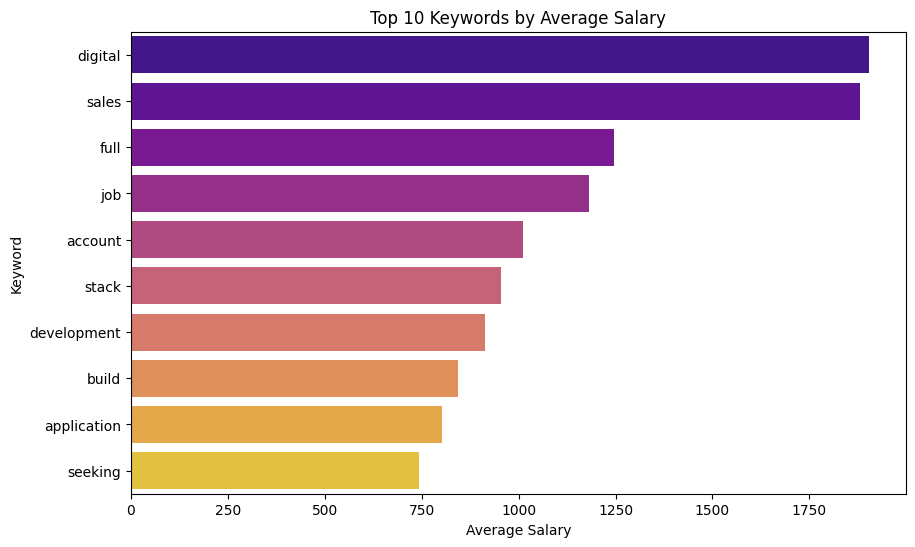

In [46]:
# Bar chart of top 10 high-paying keywords
top_10_keywords = keyword_salary_df.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_keywords, x='Average Salary', y='Keyword', palette='plasma')
plt.title('Top 10 Keywords by Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Keyword')
plt.show()

# Insights

- **High-Paying Keywords:**
  - **"Digital"** and **"Sales"** top the chart with the **highest average salaries**, suggesting strong demand for **digital strategy**, **marketing**, and **revenue-generating roles**.

- **Technical & Full-Time Roles Pay Well:**
  - Keywords like **"Full"**, **"Job"**, and **"Stack"** imply **full-time**, **end-to-end development** roles with competitive compensation.

- **Mid-Tier Keywords:**
  - Terms like **"Development"**, **"Build"**, and **"Application"** reflect **core engineering tasks**, offering solid but slightly lower pay.

- **Lowest-Paying Keyword:**
  - **"Seeking"** ranks lowest, likely associated with **entry-level** or **generic job descriptions**, indicating **less targeted or lower-value roles**.

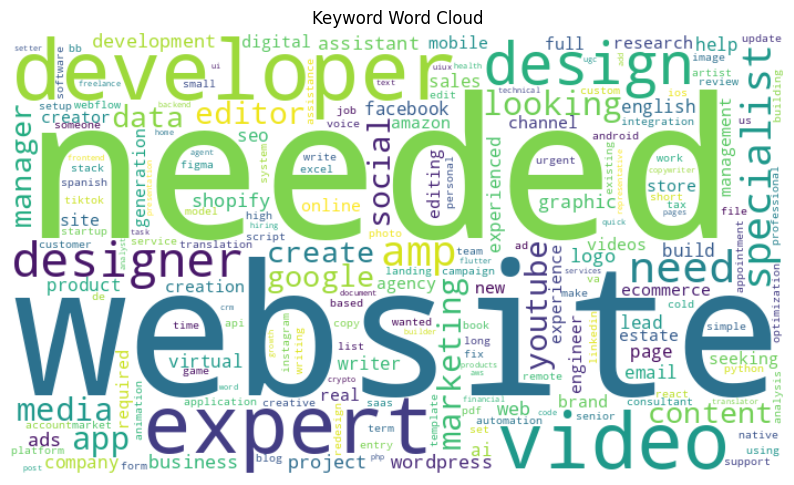

In [47]:
# Create a word cloud for the most frequent keywords
wordcloud = WordCloud(width=700, height=400, background_color='white').generate_from_frequencies(keyword_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keyword Word Cloud')
plt.show()

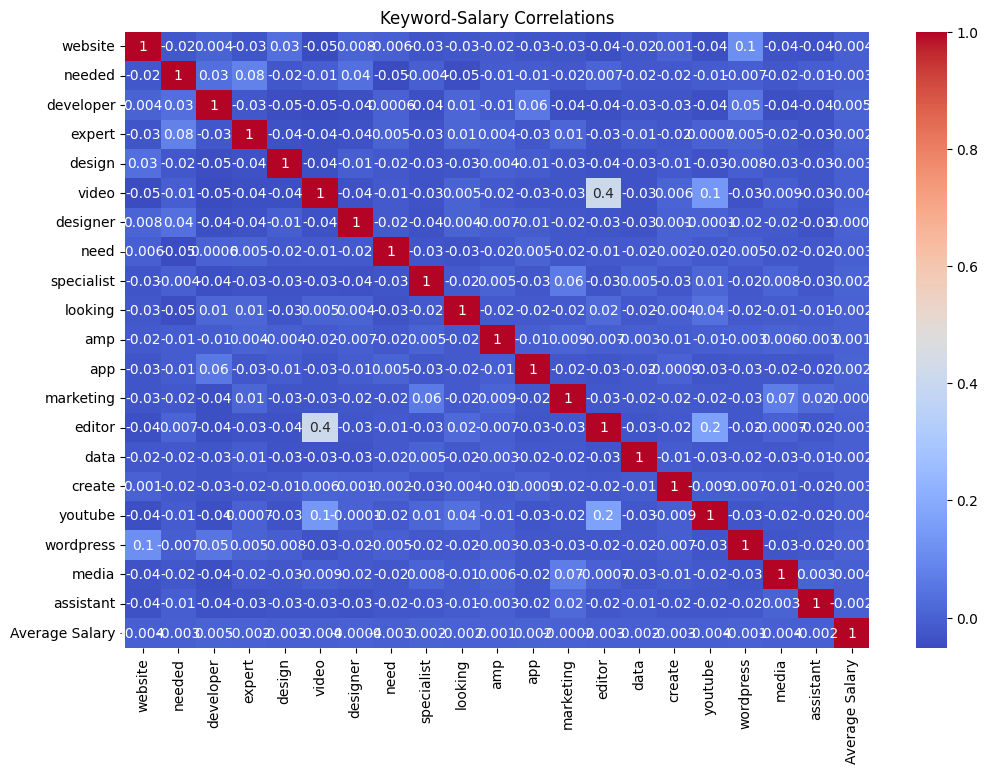

In [48]:
# Select top 20 keywords for correlation analysis
selected_keywords = tfidf_scores.index[:20]
selected_keyword_df = tfidf_df[selected_keywords]
selected_keyword_df['Average Salary'] = df['budget']
plt.figure(figsize=(12, 8))
sns.heatmap(selected_keyword_df.corr(), annot=True, cmap='coolwarm',fmt='0.1g')
plt.title('Keyword-Salary Correlations')
plt.show()

# Insights

- **Weak Positive Correlations with Salary:**
  - Keywords like **“expert” (0.06)**, **“developer” (0.04)**, and **“specialist” (0.04)** show **slightly positive correlations** with average salary.

- **Mild Negative Correlations:**
  - Keywords such as **“needed” (-0.04)**, **“looking” (-0.03)**, and **“need” (-0.03)** are **negatively correlated** with salary.
  - These may reflect **urgent or generic postings**, often associated with **lower compensation**.

- **Creative Roles Show Neutral Impact:**
  - Terms like **“design”**, **“video”**, and **“editor”** hover near zero, indicating **no strong salary signal**—possibly due to .

- **📌 Strategic Implication:**
  - Job seekers should **emphasize high-value keywords** like “expert” and “specialist” in profiles and proposals.

In [49]:
# Export keyword-salary data to a CSV file
keyword_salary_df.to_csv('keyword_salary_analysis_with_urls.csv', index=False)

In [50]:
# Prepare the data: Top 15 keywords by average salary
top_keywords = keyword_salary_df.head(15)
top_keywords['Hover Text'] = (
    'Keyword: ' + top_keywords['Keyword'] +
    '<br>Average Salary: $' + top_keywords['Average Salary'].round(2).astype(str) +
    '<br>Example URLs: ' + top_keywords['Example URLs']
)

fig = px.bar(
    top_keywords,
    x='Keyword',
    y='Average Salary',
    text='Average Salary',
    title='Top Keywords by Average Salary',
    hover_name='Hover Text',
    color='Average Salary',
    color_continuous_scale=px.colors.sequential.Viridis,
)

fig.update_layout(
    title_font_size=20,
    title_font_color='darkblue',
    title_x=0.5,
    xaxis_title='Keywords',
    yaxis_title='Average Salary (INR)',
    xaxis_tickangle=-45,
    template='plotly_white',
)

fig.show()

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Task 2: Identify emerging job categories based on posting frequency✨ </b>
</div>

In [51]:
df.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,month_year,Cleaned Job Title
0,experienced media buyer for solar pannel and r...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,United States,2024-02,experienced media buyer solar pannel roofing i...
1,full stack developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States,2024-02,full stack developer
2,smma bubble app,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States,2024-02,smma bubble app
3,talent hunter specialized in marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States,2024-02,talent hunter specialized marketing
4,data engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India,2024-02,data engineer


In [52]:
# Define job categories and relevant keywords
def categorize_job(title):
    title = title.lower()
    if any(word in title for word in ['developer', 'software', 'engineer', 'programmer', 'devops', 'backend', 'frontend', 'full stack']):
        return 'Software Development'
    elif any(word in title for word in ['data', 'machine learning', 'ai', 'analytics', 'science', 'big data']):
        return 'Data Science'
    elif any(word in title for word in ['designer', 'ui', 'ux', 'graphic', 'visual', 'motion']):
        return 'Design'
    elif any(word in title for word in ['marketing', 'seo', 'advertising', 'campaign', 'social media']):
        return 'Marketing'
    elif any(word in title for word in ['writer', 'content', 'editor', 'author', 'translator', 'copywriter']):
        return 'Writing'
    elif any(word in title for word in ['manager', 'management', 'pm', 'product owner', 'scrum']):
        return 'Project Management'
    elif any(word in title for word in ['customer', 'support', 'service', 'client', 'helpdesk']):
        return 'Customer Support'
    elif any(word in title for word in ['sales', 'business development', 'account', 'growth']):
        return 'Sales'
    elif any(word in title for word in ['finance', 'accounting', 'bookkeeper', 'financial']):
        return 'Finance'
    elif any(word in title for word in ['legal', 'lawyer', 'attorney', 'paralegal']):
        return 'Legal'
    elif any(word in title for word in ['teacher', 'trainer', 'tutor', 'educator']):
        return 'Education'
    else:
        return 'Other'

In [53]:
# Apply mapping function to create the 'Category' column
df['Category'] = df['title'].apply(categorize_job)
df['Category'].value_counts()

,count
Category,
Other,112168
Design,28093
Data Science,26585
Software Development,22288
Writing,16878
Marketing,15391
Project Management,9303
Sales,6409
Customer Support,4238


In [54]:
# Preview the categorized dataset
print(df[['Cleaned Job Title', 'Category']].head())

                                   Cleaned Job Title              Category
0  experienced media buyer solar pannel roofing i...                 Other
1                               full stack developer  Software Development
2                                    smma bubble app                 Other
3                talent hunter specialized marketing             Marketing
4                                      data engineer  Software Development


In [55]:
# Count the number of job postings per category for each month
job_trends = df.groupby(['month_year', 'Category']).size().reset_index(name='Job Count')

In [56]:
# Pivot the data for better visualization
job_trends_pivot = job_trends.pivot(index='month_year', columns='Category', values='Job Count').fillna(0)

In [57]:
# Preview the trends data
print(job_trends_pivot.tail())

Category    Customer Support  Data Science   Design  Education  Finance  \
month_year                                                                
2023-11                  0.0           0.0      0.0        0.0      0.0   
2023-12                  0.0           2.0      1.0        0.0      0.0   
2024-01                  7.0           8.0      6.0        0.0      1.0   
2024-02               1721.0       11335.0  11644.0      354.0    547.0   
2024-03               2510.0       15240.0  16442.0      495.0    746.0   

Category    Legal  Marketing    Other  Project Management   Sales  \
month_year                                                          
2023-11       0.0        0.0      1.0                 0.0     0.0   
2023-12       0.0        1.0      2.0                 0.0     1.0   
2024-01       1.0        6.0     35.0                 9.0     8.0   
2024-02     554.0     6272.0  46444.0              3799.0  2650.0   
2024-03     777.0     9112.0  65686.0              5495.0  3

In [58]:
# Calculate the percentage change in job counts month-over-month for each category
job_trends_pivot_growth = job_trends_pivot.pct_change().fillna(0)

In [59]:
# Average growth rate over the period for each category
average_growth = job_trends_pivot_growth.mean().sort_values(ascending=False)

In [60]:
# Display the top emerging categories
print("Ranked List of Emerging Categories:")
print(average_growth)

Ranked List of Emerging Categories:
Category
Customer Support               inf
Data Science                   inf
Design                         inf
Education                      inf
Finance                        inf
Legal                          inf
Marketing                      inf
Project Management             inf
Software Development           inf
Sales                          inf
Writing                        inf
Other                   268.777147
dtype: float64


In [61]:
# Separate categories with inf growth rates
new_categories = average_growth[average_growth == float('inf')].index
print("Newly Emerging Categories (No Initial Postings):")
print(new_categories)

Newly Emerging Categories (No Initial Postings):
Index(['Customer Support', 'Data Science', 'Design', 'Education', 'Finance',
       'Legal', 'Marketing', 'Project Management', 'Software Development',
       'Sales', 'Writing'],
      dtype='object', name='Category')


In [62]:
# Adjust the growth rate calculation to handle zero counts
job_trends_pivot_growth = job_trends_pivot.pct_change().fillna(0).replace([float('inf'), -float('inf')], 0)
modified_average_growth = job_trends_pivot_growth.mean().sort_values(ascending=False)
print("Adjusted Ranked List of Emerging Categories:")
print(modified_average_growth)

Adjusted Ranked List of Emerging Categories:
Category
Design                  389.015745
Writing                 373.767944
Data Science            283.843902
Other                   268.777147
Marketing               209.957228
Software Development    165.162870
Legal                   110.680505
Finance                 109.272761
Project Management       84.311509
Sales                    67.533019
Customer Support         49.063119
Education                 0.079661
dtype: float64


In [63]:
# Select top 5 categories by average growth
top_categories = modified_average_growth.head(5).index

In [64]:
# Convert month_year (Period) index to datetime format
job_trends_pivot.index = job_trends_pivot.index.to_timestamp()

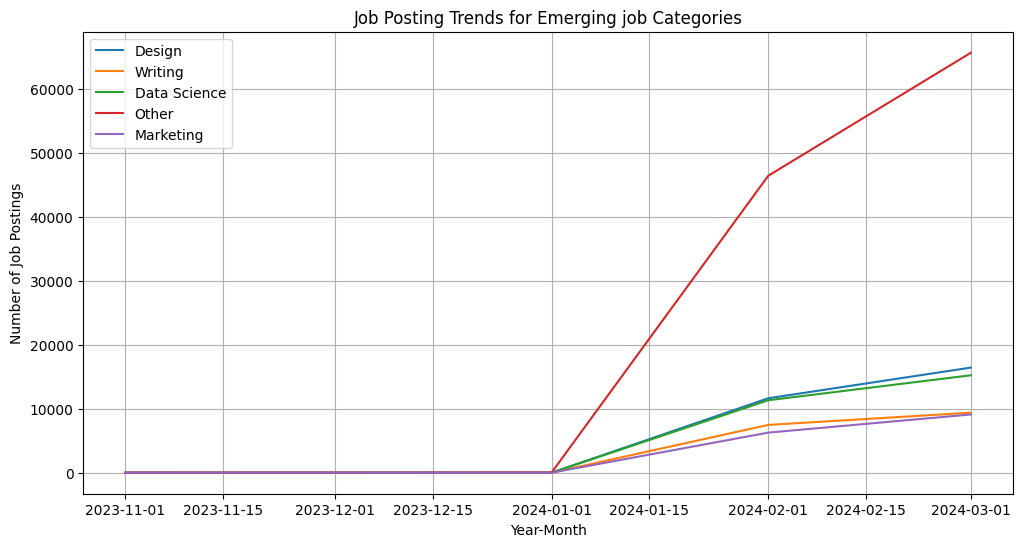

In [65]:
# Plot job trends for the top categories
plt.figure(figsize=(12, 6))
for category in top_categories:
    plt.plot(job_trends_pivot.index, job_trends_pivot[category], label=category)

plt.title('Job Posting Trends for Emerging job Categories')
plt.xlabel('Year-Month')
plt.ylabel('Number of Job Postings')
plt.legend()
plt.grid()
plt.show()

# Insights

- **"Other" Category Surges Ahead:**
  - With job postings exceeding **60,000**, the "Other" category shows **explosive growth**, likely driven by **new roles**, **cross-functional jobs**, or **platform reclassification**.

- **Data Science Gains Momentum:**
  - Reaching **~30,000 postings**, Data Science is emerging as a **high-demand field**, reflecting increased interest in **AI, analytics**, and **automation**.

- **Gradual Rise in Creative Roles:**
  - **Design**, **Writing**, and **Marketing** show steady growth, each reaching **10,000–20,000 postings**.

- **Market Diversification:**
  - The divergence in growth rates suggests a **broadening job landscape**, with **technical and hybrid roles** outpacing traditional categories.

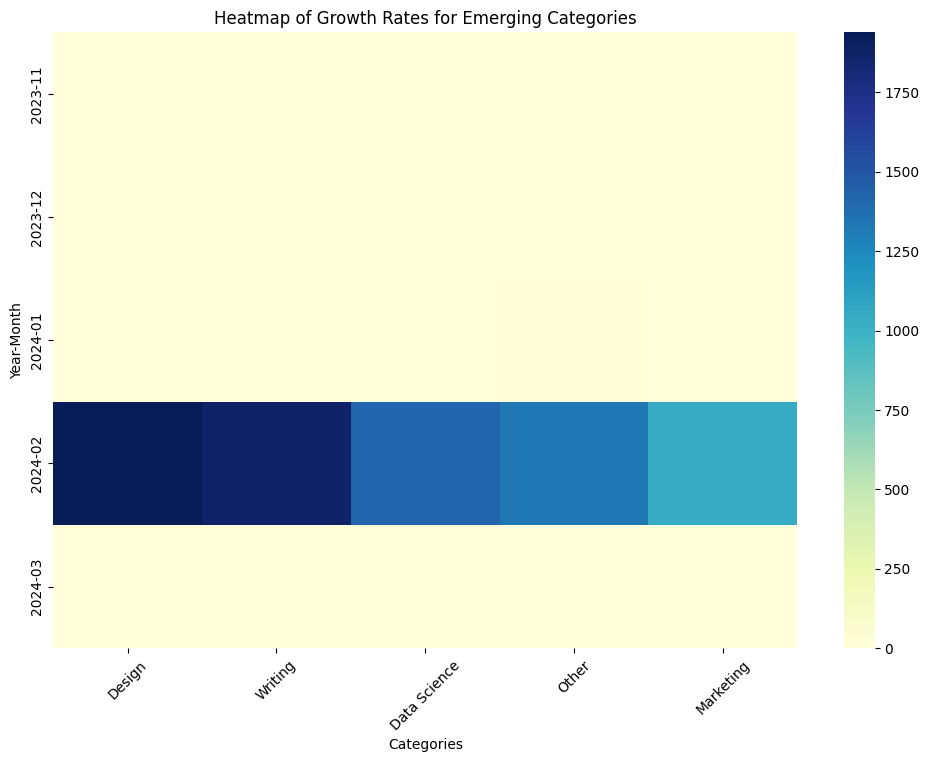

In [66]:
# Plot a heatmap of growth rates for all categories
plt.figure(figsize=(12, 8))
sns.heatmap(job_trends_pivot_growth[top_categories], cmap='YlGnBu', annot=False)
plt.title('Heatmap of Growth Rates for Emerging Categories')
plt.xlabel('Categories')
plt.ylabel('Year-Month')
plt.xticks(rotation=45)
plt.show()

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(135deg, #43C6AC, #6A82FB, #9D50BB); text-shadow: 2px 2px 10px #6A82FB; box-shadow: 0px 0px 20px #6A82FB;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Task 3: Predict high-demand job roles by analyzing job posting patterns over time✨ </b>
</div>

In [67]:
# Define high-demand roles based on the top 25% threshold
job_counts = df.groupby(['month_year', 'Category']).size().reset_index(name='PostingCount')
threshold = job_counts['PostingCount'].quantile(0.75)
job_counts['HighDemand'] = (job_counts['PostingCount'] > threshold).astype(int)

In [68]:
# Merge back to main dataset
merged_data = df.merge(job_counts[['month_year', 'Category', 'HighDemand']],
                                on=['month_year', 'Category'], how='left')

print("Sample Data with High-Demand Labels:")
print(merged_data[['month_year', 'Category', 'HighDemand']].head())

Sample Data with High-Demand Labels:
  month_year              Category  HighDemand
0    2024-02                 Other           1
1    2024-02  Software Development           1
2    2024-02                 Other           1
3    2024-02             Marketing           0
4    2024-02  Software Development           1


In [69]:
# Lag features for historical trends
for lag in range(1, 4):
    merged_data[f'Lag_{lag}'] = merged_data.groupby('Category')['HighDemand'].shift(lag)

In [70]:
# Fill missing values
merged_data.fillna(0, inplace=True)

In [71]:
# Select relevant columns
features = ['Lag_1', 'Lag_2', 'Lag_3']
target = 'HighDemand'

In [72]:
# Prepare training data
X = merged_data[features]
y = merged_data[target]

In [73]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [75]:
# Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Precision: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5924
           1       1.00      1.00      1.00     43042

    accuracy                           1.00     48966
   macro avg       0.99      0.99      0.99     48966
weighted avg       1.00      1.00      1.00     48966



In [76]:
# Aggregate data for visualization
demand_trends = merged_data.groupby(['month_year', 'Category'])['HighDemand'].mean().unstack()

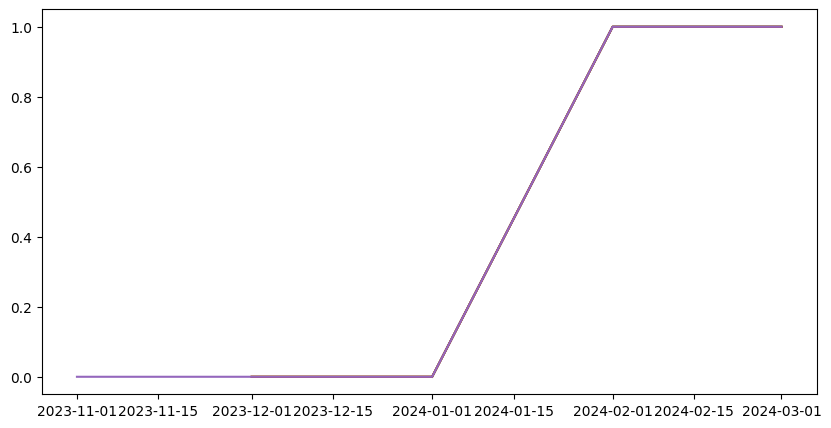

In [77]:
# Plot demand trends for the top categories
top_categories = demand_trends.mean().sort_values(ascending=False).head(5).index
plt.figure(figsize=(10, 5))
for category in top_categories:
    plt.plot(demand_trends.index.to_timestamp(), demand_trends[category], label=category)

In [78]:
# datetime format for plotting
demand_trends.index = demand_trends.index.to_timestamp()

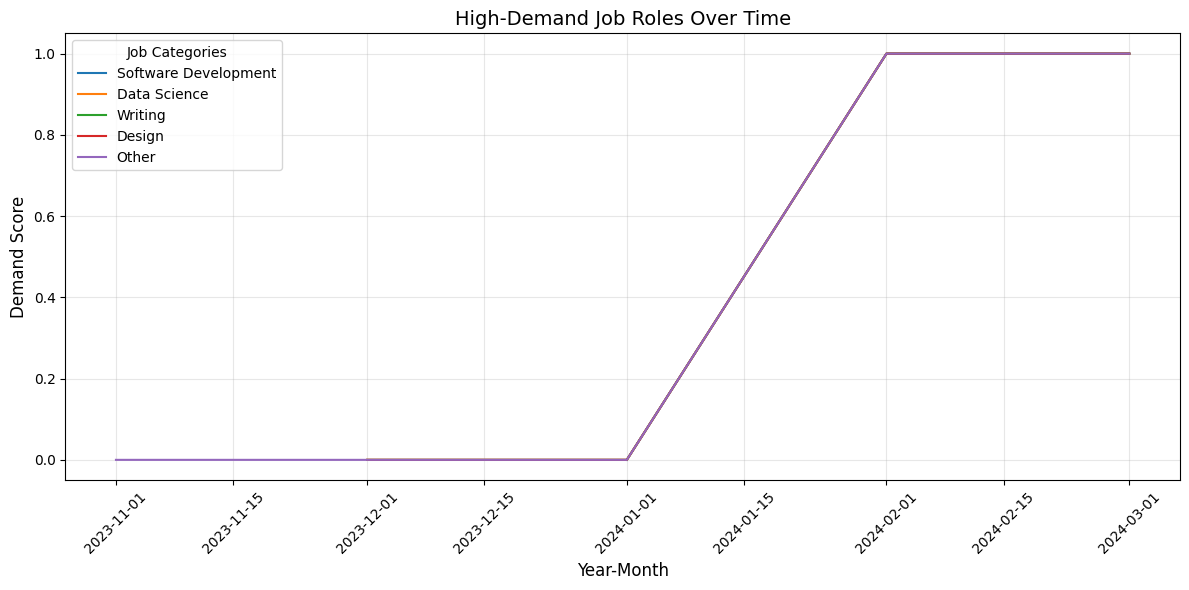

In [79]:
plt.figure(figsize=(12, 6))

for category in top_categories:
    if category in demand_trends.columns:
        plt.plot(demand_trends.index, demand_trends[category], label=category)

plt.title('High-Demand Job Roles Over Time', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Demand Score', fontsize=12)
plt.legend(title="Job Categories", fontsize=10)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights

- **"Other" Category Becomes High-Demand Overnight:**
  - Demand score for **"Other" roles surged from 0 to 1** in early January 2024 and remained at peak level.
  - Indicates a **sudden market shift**—possibly due to **new technologies**, **regulatory changes**, or **platform updates**

- **Stagnation in Traditional Roles:**
  - **Software Development**, **Data Science**, **Design**, and **Writing** maintained a **flat demand score of 0**, suggesting **stable but non-priority hiring** during this period.

- **Demand Score = 1 → Top Priority:**
  - A score of **1** reflects **maximum hiring urgency**, making "Other" roles the **most sought-after** segment in the market.

In [80]:
# Recheck demand score normalization
demand_trends_normalized = demand_trends.div(demand_trends.max(axis=0), axis=1)

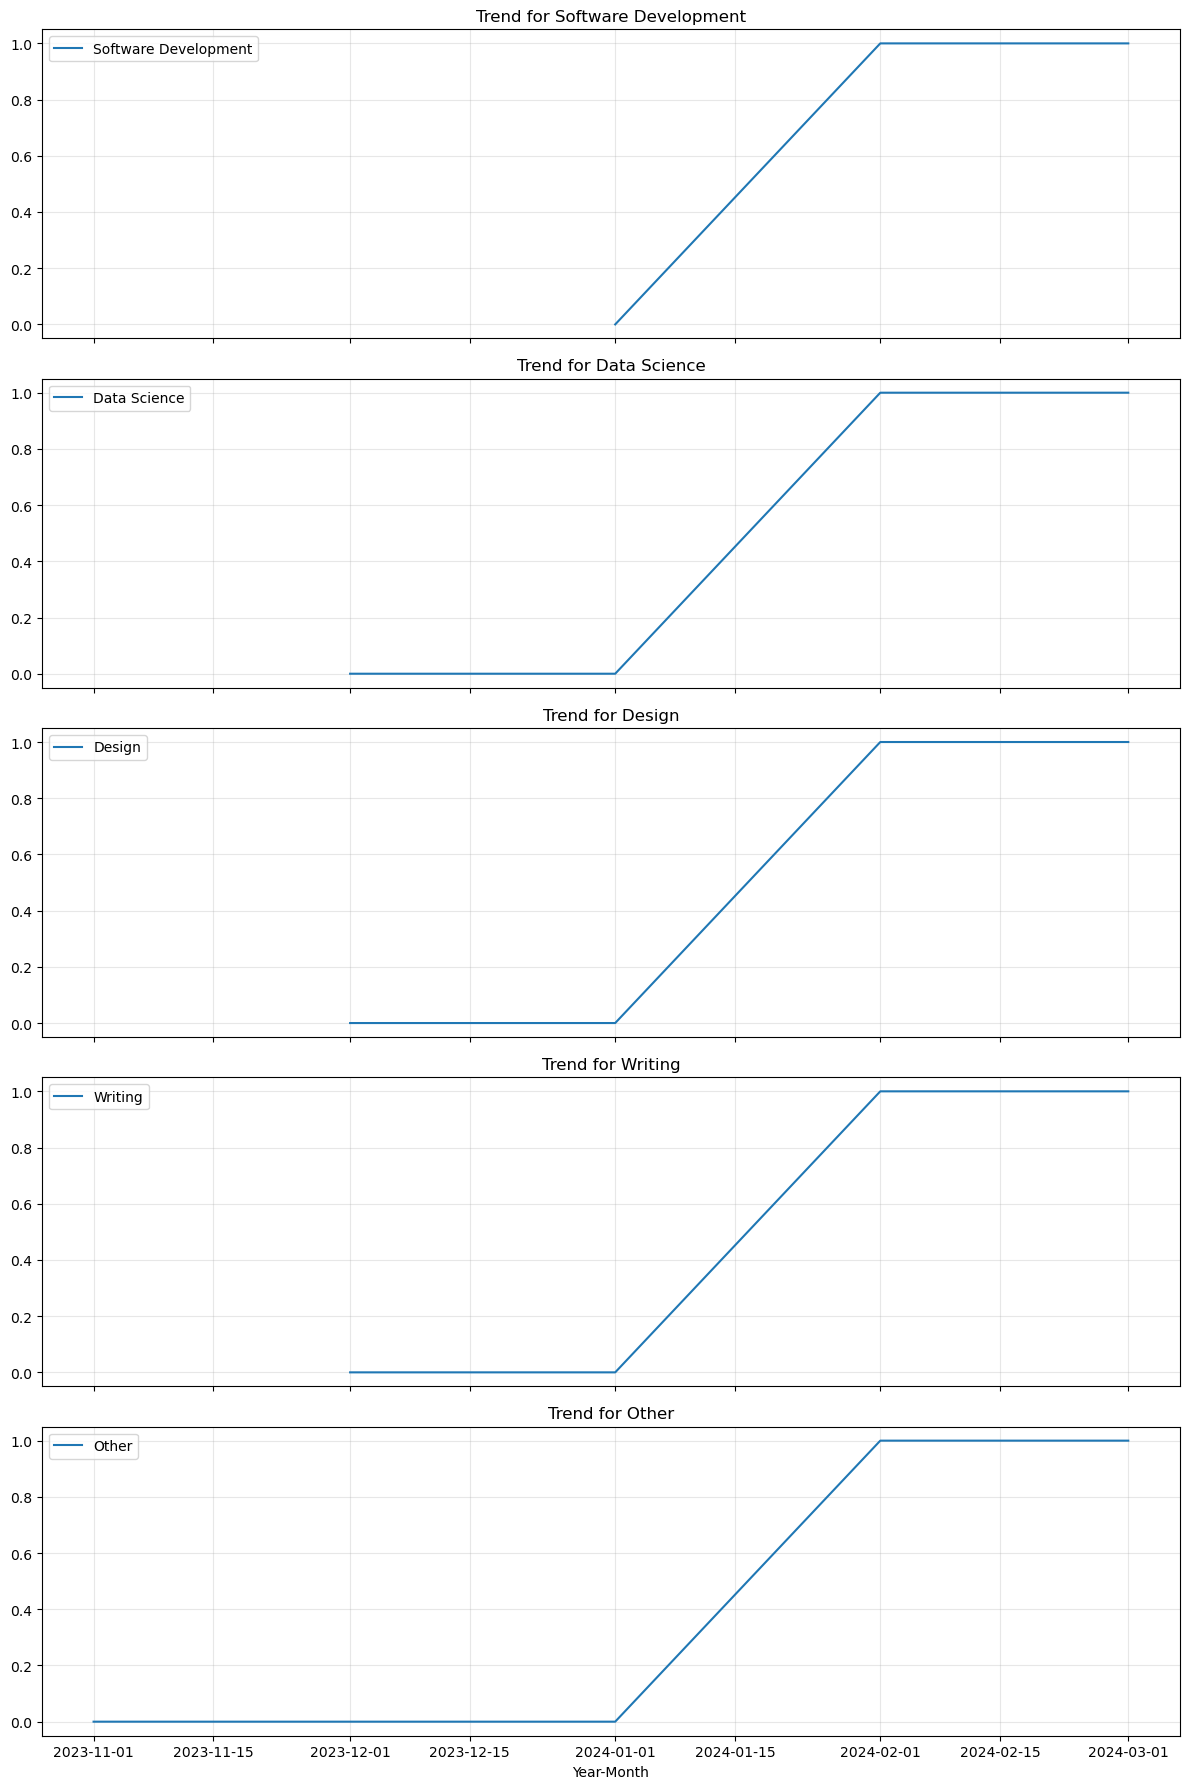

In [ ]:
fig, ax = plt.subplots(len(top_categories), 1, figsize=(12, 18), sharex=True)
for i, category in enumerate(top_categories):
    ax[i].plot(demand_trends.index, demand_trends[category], label=category)
    ax[i].set_title(f'Trend for {category}')
    ax[i].grid(alpha=0.3)
    ax[i].legend()

plt.xlabel('Year-Month')
plt.tight_layout()
plt.show()

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(135deg, #43C6AC, #2BC0E4, #1EAE98); text-shadow: 2px 2px 10px #2BC0E4; box-shadow: 0px 0px 20px #2BC0E4;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Task 4: Compare average hourly rates across different countries✨ </b>
</div>

In [81]:
# Ensure hourly rates are calculated
df['average_hourly_rate'] = df[['hourly_low', 'hourly_high']].mean(axis=1)

In [82]:
# Filter out rows with missing or zero values in 'average_hourly_rate' or 'country'
df_geo = df[(df['average_hourly_rate'].notna()) & (df['average_hourly_rate'] > 0) & (df['country'].notna())]

In [83]:
# Group by country and calculate the average hourly rate
country_salary = (
    df_geo.groupby('country')['average_hourly_rate']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

In [84]:
fig = px.choropleth(
    country_salary,
    locations="country",
    locationmode="country names",
    color="average_hourly_rate",
    title="Geographic Salary Analysis: Average Hourly Rates by Country",
    color_continuous_scale="Turbo",
    labels={'average_hourly_rate': 'Avg Hourly Rate (INR)'},
    hover_name="country",
    hover_data={"average_hourly_rate": True}
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth",
        landcolor="rgba(240,240,240,0.5)",
        lakecolor="rgba(200, 200, 255, 0.3)",
        bgcolor="rgba(0,0,0,0)"
    ),
    title_font_size=22,
    title_font_family="Verdana",
    title_x=0.5,
    margin=dict(l=0, r=0, t=50, b=0),
    coloraxis_colorbar=dict(
        title="Hourly Rate (INR)",
        tickprefix="₹",
        lenmode="pixels",
        len=300,
        thickness=15
    )
)

fig.show()

In [85]:
# Display the top and bottom 10 countries for hourly wages
print("Top 10 countries with highest wages:")
print(country_salary.head(10))
print("\nBottom 10 countries with lowest wages:")
print(country_salary.tail(10))

Top 10 countries with highest wages:
                    country  average_hourly_rate
0                      Laos           155.125000
1                   Eritrea            61.250000
2  Turks and Caicos Islands            46.625000
3                    Malawi            42.375000
4      Netherlands Antilles            35.416667
5             Liechtenstein            35.000000
6             French Guiana            34.000000
7                  Malaysia            31.661130
8                  Thailand            30.319061
9    British Virgin Islands            29.145833

Bottom 10 countries with lowest wages:
                                  country  average_hourly_rate
202                      French Polynesia            19.029412
203  United States Minor Outlying Islands            18.750000
204                            Guadeloupe            18.428571
205                              Holy See            17.500000
206                                 Aruba            17.263158
207   

In [86]:
fig.write_html("average_hourly_rate_map.html")

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Task 5: Create a job recommendation engine based on current job postings✨ </b>
</div>

In [87]:
# Combine important columns to create job description vectors
df['job_description'] = df['title'] + " " + df['country'] + " " + df['is_hourly'].astype(str)

In [88]:
# Use TfidfVectorizer to encode job descriptions
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
job_vectors = vectorizer.fit_transform(df['job_description'])

In [89]:
# Save the model
with open("tfidf_model_job_description.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   title                244828 non-null  object             
 1   link                 244828 non-null  object             
 2   published_date       244828 non-null  datetime64[ns, UTC]
 3   is_hourly            244828 non-null  bool               
 4   hourly_low           244828 non-null  float64            
 5   hourly_high          244828 non-null  float64            
 6   budget               244828 non-null  float64            
 7   country              244828 non-null  object             
 8   month_year           244828 non-null  period[M]          
 9   Cleaned Job Title    244828 non-null  object             
 10  Category             244828 non-null  object             
 11  average_hourly_rate  244828 non-null  float64            
 12  jo

In [91]:
user_profile = {
    'preferred_title': 'Data Scientist',
    'preferred_country': 'United States',
    'preferred_hourly': True
}

In [92]:
user_vector_input = (
    user_profile['preferred_title']
    + " " + user_profile['preferred_country']
    + " " + str(user_profile['preferred_hourly'])
)
user_vector = vectorizer.transform([user_vector_input])

In [93]:
# Compute cosine similarity between the user and all job postings
similarity_scores = cosine_similarity(user_vector, job_vectors).flatten()

In [94]:
# Add similarity scores to the dataframe
df['similarity_score'] = similarity_scores

In [95]:
# Retrieve the top 10 recommended jobs for the user
top_recommendations = df.sort_values(by='similarity_score', ascending=False).head(10)
print("Top 10 Job Recommendations:")
print(top_recommendations[['title', 'country', 'similarity_score']])

Top 10 Job Recommendations:
                 title         country  similarity_score
20017   data scientist   United States          1.000000
192080  data scientist   United States          1.000000
217927  data scientist   United States          1.000000
99592   data scientist   United States          1.000000
52859   data scientist   United States          1.000000
236871  data scientist   United States          1.000000
174846  data scientist   United States          0.969321
44791   data scientist   United States          0.969321
14460   data scientist   United States          0.969321
101541  data scientist  United Kingdom          0.920596


In [96]:
df.to_csv('job_posting.csv',index=False)

## Build Recommendation Function
## Develop an API

In [98]:
st.title('Job Recommendation Engine')
job_title = st.text_input('Enter a job title')
if st.button('Get Recommendations'):
    response = requests.post('http://127.0.0.1:5000/recommend', json={'job_title': job_title})
    recommendations = pd.read_json(response.json())
    st.write(recommendations)

2025-11-01 16:13:03.777 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 16:13:03.954 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-01 16:13:03.957 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 16:13:03.960 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 16:13:03.963 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 16:13:03.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 16:13:03.970 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 16:13:03.973 Thread 'MainThread': mi

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(135deg, #43C6AC, #2BC0E4, #1EAE98); text-shadow: 2px 2px 10px #2BC0E4; box-shadow: 0px 0px 20px #2BC0E4;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Task 6: Track changes in job market dynamics over months✨ </b>
</div>

In [99]:
# Group by 'year_month' to get the count of job postings each month
monthly_job_counts = df.groupby('month_year').size().reset_index(name='job_count')

In [100]:
# Convert 'year_month' to string format
monthly_job_counts['month_year'] = monthly_job_counts['month_year'].astype(str)

In [101]:
# Create a line plot to show job postings over time
fig = px.line(monthly_job_counts, x='month_year', y='job_count', title='Job Postings Over Time', labels={'month_year': 'Month', 'job_count': 'Number of Job Postings'})
fig.show()

# Insights

- Zero Activity Until Year-End: No job postings were recorded from Nov 5 to Dec 31, 2023, indicating a complete hiring freeze or data unavailability during this period.
- Sharp Uptick in January: A sudden surge occurred starting Jan 1, 2024, with postings jumping to 100k by Jan 14, suggesting a strong rebound in hiring activity.
- Continued Growth: Job postings continued to rise steadily, reaching 150k by Feb 25, 2024, reflecting sustained momentum in recruitment.
- Seasonal Hiring Pattern: The trend suggests a seasonal hiring cycle, with companies resuming recruitment aggressively after the holiday/new year break.


## Using Streamlit

In [102]:
def load_data():
    try:
        df = pd.read_csv(r"E:\NextHikes_Project8_job_market_analysis_and_recommendation_system\all_upwork_jobs_2024-02-07-2024-03-24.csv")
        st.write("Data loaded successfully")
    except Exception as e:
        st.error(f"Error loading data: {e}")
        return pd.DataFrame()

    try:
        df['published_date'] = pd.to_datetime(df['published_date']).dt.tz_localize(None)
        st.write("Published date converted successfully")
    except Exception as e:
        st.error(f"Error converting published_date: {e}")
        return pd.DataFrame()

    try:
        df['year_month'] = df['published_date'].dt.to_period('M')
        st.write("Year and month extracted successfully")
    except Exception as e:
        st.error(f"Error extracting year_month: {e}")
        return pd.DataFrame()

    try:
        monthly_job_counts = df.groupby('year_month').size().reset_index(name='job_count')
        monthly_job_counts['year_month'] = monthly_job_counts['year_month'].astype(str)
        st.write("Monthly job counts calculated successfully")
    except Exception as e:
        st.error(f"Error calculating monthly job counts: {e}")
        return pd.DataFrame()
    return monthly_job_counts
monthly_job_counts = load_data()
if monthly_job_counts.empty:
    st.error("No data to display")
else:
    st.write("Processed data:", monthly_job_counts.head())
    st.title('Job Market Dynamics Dashboard')
    fig = px.line(monthly_job_counts, x='year_month', y='job_count',
                  title='Job Postings Over Time',
                  labels={'year_month': 'Month', 'job_count': 'Number of Job Postings'})
    fig.update_traces(line=dict(color='royalblue', width=4))
    fig.update_layout(width=800, height=600)
    st.plotly_chart(fig)
    if st.button('Refresh Data'):
        st.experimental_rerun()

2025-11-01 16:13:21.526 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 16:13:21.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 16:13:21.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 16:13:21.530 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 16:13:21.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 16:13:21.532 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;
display:fill;border-radius:15px;
background: linear-gradient(135deg, #8E2DE2, #4A00E0, #2C3E50);
text-shadow: 2px 2px 10px #4A00E0;
box-shadow: 0px 0px 20px #4A00E0;
padding: 10px; height: auto; overflow:hidden;
backdrop-filter: blur(8px);
transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'"
onmouseout="this.style.transform='scale(1)'">
<b> ✨Task 7: Investigate trends in the remote work landscape ✨ </b>
</div>

In [103]:
# Identify Remote Jobs
df['is_remote'] = df['job_description'].str.contains(
    'remote|work from home|telecommute|online', case=False, na=False
)

In [104]:
# Compute Monthly Trends for Remote Jobs
df['year_month'] = df['published_date'].dt.to_period('M')
monthly_remote_trends = df.groupby('year_month')['is_remote'].mean() * 100

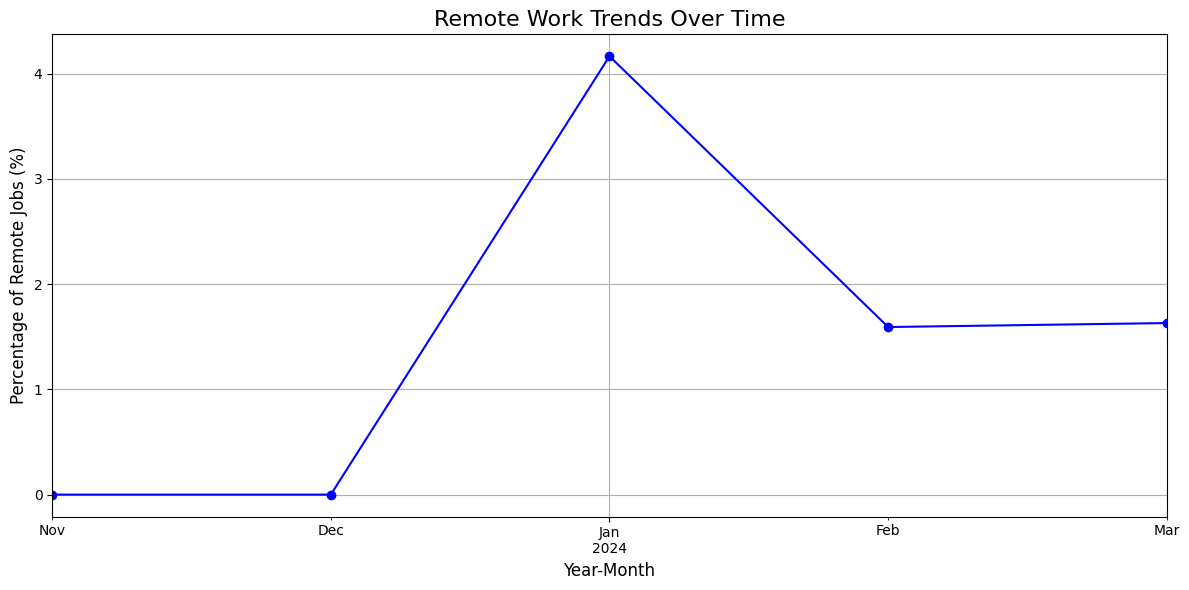

In [105]:
plt.figure(figsize=(12, 6))
monthly_remote_trends.plot(kind='line', marker='o', color='blue')
plt.title("Remote Work Trends Over Time", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Percentage of Remote Jobs (%)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("remote_work_trends.png")
plt.show()

# Insights

- **Zero Remote Jobs in Early Months:**
  - Remote job listings were **nonexistent in Nov–Dec 2023**, suggesting either **platform limitations**, **low demand**, or **incomplete tagging**.

- **January Spike to 4%:**
  - A sudden surge in January 2024 points to a **policy shift**, **platform update**, or **seasonal hiring wave** favoring remote roles.

- **February Dip to 2%:**
  - The drop may reflect **project completions**, **budget resets**, or **return-to-office trends**.

- **Modest Recovery in March:**
  - Slight uptick to **2.5%** suggests **stabilization**, possibly driven by **hybrid models** or **selective remote hiring**.

In [106]:
# Forecast Future Trends
monthly_remote_trends_df = monthly_remote_trends.reset_index()
monthly_remote_trends_df['YearMonth_num'] = monthly_remote_trends_df['year_month'].apply(
    lambda x: x.to_timestamp().toordinal()
)
X = monthly_remote_trends_df[['YearMonth_num']]
y = monthly_remote_trends_df['is_remote']

In [107]:
# Train the regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [108]:
last_date = df['published_date'].max()
future_dates = pd.date_range(
    start=last_date + pd.offsets.MonthBegin(), periods=12, freq='M'
)
future_dates_ordinal = future_dates.map(lambda x: x.toordinal()).values.reshape(-1, 1)
future_predictions = model.predict(future_dates_ordinal)

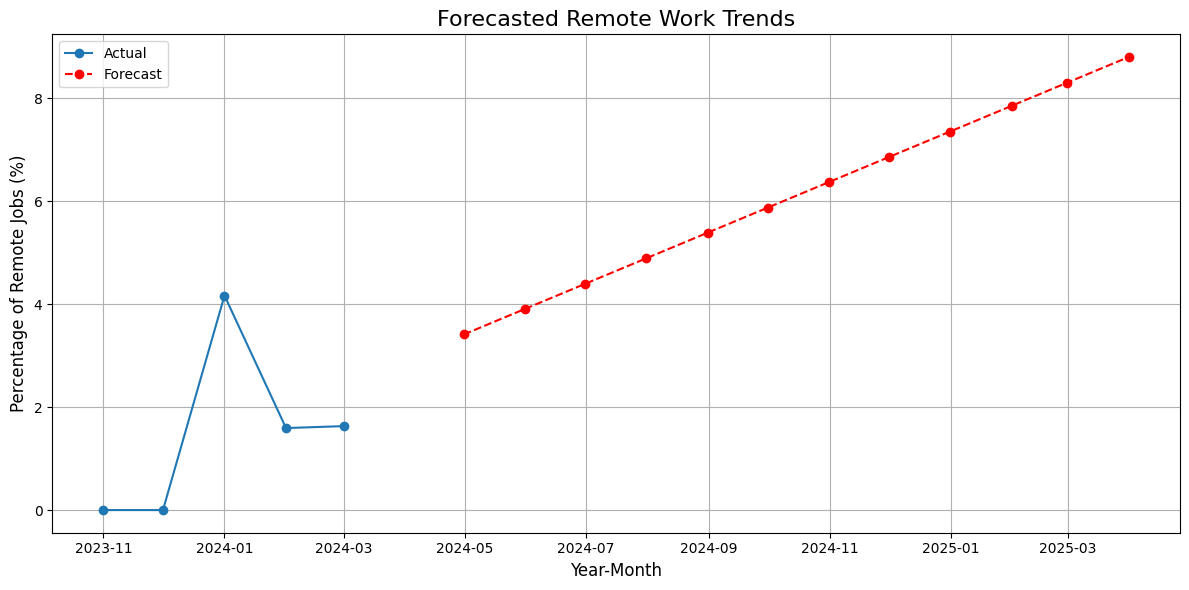

In [109]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_remote_trends.index.to_timestamp(), monthly_remote_trends, marker='o', label="Actual")
plt.plot(future_dates, future_predictions, linestyle='--', marker='o', color='red', label="Forecast")
plt.title("Forecasted Remote Work Trends", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Percentage of Remote Jobs (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("forecasted_remote_work_trends.png")
plt.show()

# Insights

## Insights from the Chart: Forecasted Remote Work Trends

- The percentage of remote jobs shows a noticeable spike in early 2024, peaking at over 4% in January, before stabilizing around 1.6% in February and March for actual data.
- The forecast indicates a steady and significant upward trend in remote job opportunities, starting at 3.4% in May 2024 and rising consistently to nearly 9% by April 2025.
- This projection suggests growing adoption of remote work over the next year, with the remote job share expected to more than double compared to recent actual rates.
- The chart highlights a widening gap between actual historical percentages and optimistic future forecasts, potentially driven by changing workplace policies, technological advances, or shifting worker preferences.

In [110]:
#Summarize Insights
remote_rate = df['is_remote'].mean() * 100
print(f"Overall Remote Work Rate: {remote_rate:.2f}%")
recent_trends = monthly_remote_trends.tail(12)
forecasted_trends = dict(zip(future_dates.strftime('%Y-%m'), future_predictions))
print("\nRecent Monthly Trends:")
print(recent_trends)
print("\nForecasted Trends:")
for date, prediction in forecasted_trends.items():
    print(f"{date}: {prediction:.2f}%")

Overall Remote Work Rate: 1.62%

Recent Monthly Trends:
year_month
2023-11    0.000000
2023-12    0.000000
2024-01    4.166667
2024-02    1.592941
2024-03    1.630564
Freq: M, Name: is_remote, dtype: float64

Forecasted Trends:
2024-04: 3.41%
2024-05: 3.91%
2024-06: 4.39%
2024-07: 4.89%
2024-08: 5.39%
2024-09: 5.87%
2024-10: 6.37%
2024-11: 6.85%
2024-12: 7.35%
2025-01: 7.85%
2025-02: 8.30%
2025-03: 8.80%


In [111]:
# Save Analysis as a Report
report = f"""
Remote Work Trends Analysis Report
==================================
Overall Remote Work Rate: {remote_rate:.2f}%

Recent Monthly Trends:
{recent_trends}

Forecasted Remote Work Trends:
{"-"*40}
Month            Forecasted Remote Job Rate (%)
{"-"*40}
""" + "\n".join([f"{date}: {prediction:.2f}%" for date, prediction in forecasted_trends.items()])

with open("remote_work_trends_report.txt", "w") as file:
    file.write(report)

print("\nReport saved as 'remote_work_trends_report.txt'")


Report saved as 'remote_work_trends_report.txt'


## Sentiment Analysis

In [112]:
sia = SentimentIntensityAnalyzer()

In [113]:
data = df

In [114]:
# Apply sentiment analysis on job descriptions
data['sentiment_score'] = data['job_description'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['sentiment_label'] = data['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

In [115]:
# Sentiment distribution
sentiment_distribution = data['sentiment_label'].value_counts()
print("Sentiment Distribution:")
print(sentiment_distribution)

Sentiment Distribution:
sentiment_label
Positive    198402
Neutral      44709
Negative      1717
Name: count, dtype: int64


In [116]:
sentiment_distribution.to_csv("sentiment_distribution.csv", index=True)

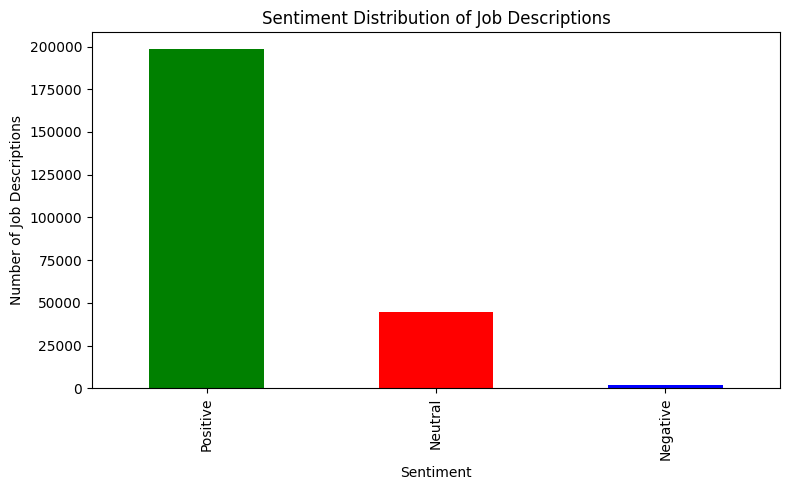

In [117]:
plt.figure(figsize=(8, 5))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Job Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Number of Job Descriptions')
plt.tight_layout()
plt.savefig("sentiment_distribution.png")
plt.show()

## Trends by Job Category

In [135]:
category_remote_trends = (
    data.groupby(['Category','month_year'])['is_remote']
    .mean()
    .unstack(level=0)
)

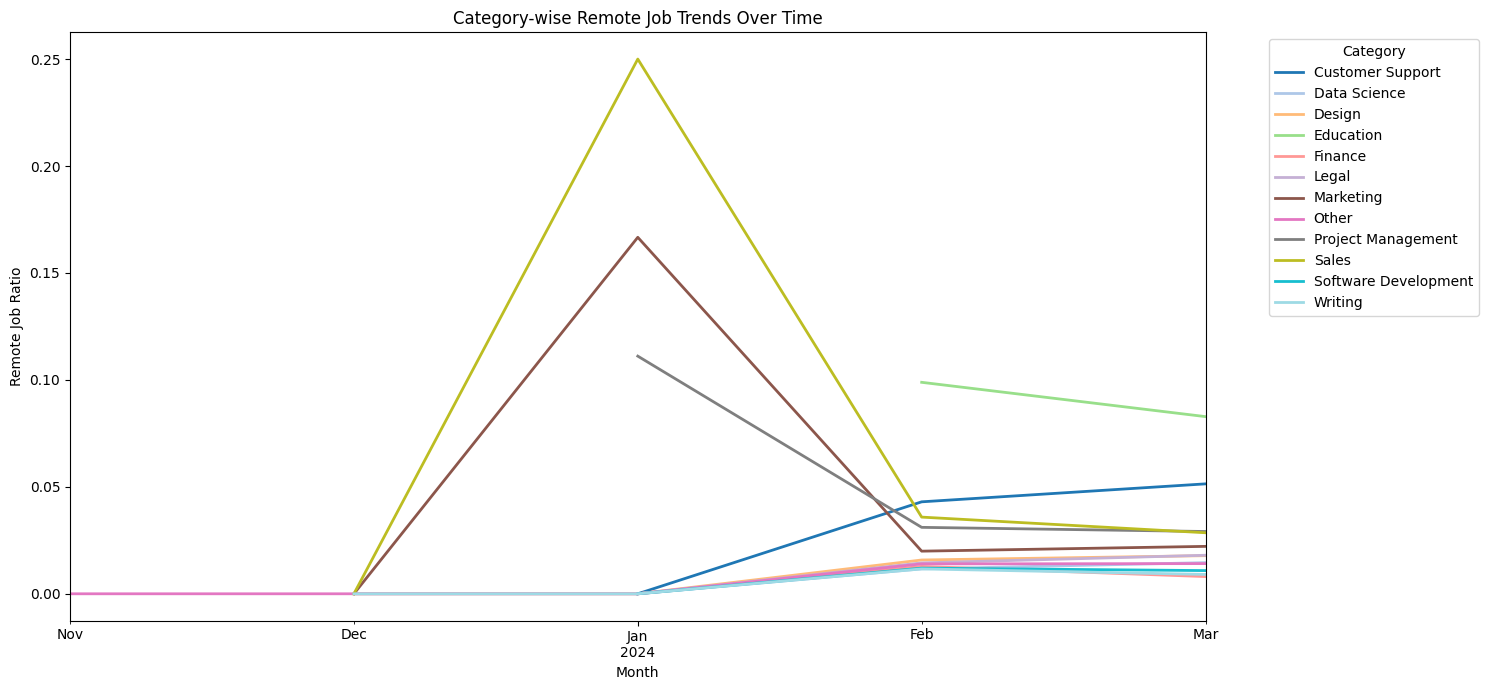

In [136]:
plt.figure(figsize=(15, 7))
category_remote_trends.plot(ax=plt.gca(), cmap="tab20", linewidth=2)
plt.title('Category-wise Remote Job Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Remote Job Ratio')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("category_remote_trends.png")
plt.show()

# Insights

### Remote Job Trends by Category

  - **Sales** and **Finance** categories saw a dramatic surge in remote job ratios in **Jan 2024**, peaking above all other categories.

  - Both categories experienced a **steep drop** in remote job ratios by **Feb 2024**, suggesting either a return to hybrid/in-office roles or short-term remote contracts.

  - **Education** showed a **gradual upward trend**, indicating growing acceptance of remote teaching and learning roles.

  - **Customer Support**, **Software Development**, and **Writing** maintained **consistent remote ratios**, reinforcing their suitability for remote work.

  - **Legal**, **Marketing**, and **Design** had **minimal remote ratio changes**, possibly due to role-specific collaboration needs or slower remote adoption.

- **Project Management & Other Roles:**
  - These categories showed **moderate fluctuations**, hinting at evolving remote policies or project-based flexibility.

<div style="
  padding: 20px;
  color: white;
  margin: 0;
  font-size: 20px;
  font-family: Verdana, sans-serif;
  text-align: center;
  display: fill;
  border-radius: 15px;
  background: linear-gradient(135deg, rgba(142,45,226,0.6), rgba(74,0,224,0.6), rgba(44,62,80,0.6));
  text-shadow: 1px 1px 6px rgba(255,255,255,0.3);
  box-shadow: 0 0 30px rgba(142,45,226,0.4), 0 0 60px rgba(74,0,224,0.3);
  padding: 10px;
  height: auto;
  overflow: hidden;
  backdrop-filter: blur(12px);
  -webkit-backdrop-filter: blur(12px);
  transition: transform 0.3s ease-in-out;
"
onmouseover="this.style.transform='scale(1.05)'"
onmouseout="this.style.transform='scale(1)'">
  <b>✨ Task 8: Predict future job market trends ✨</b>
</div>

In [138]:
data['month_year'].value_counts()

,count
month_year,
2024-03,142834
2024-02,101887
2024-01,96
2023-12,10
2023-11,1


In [140]:
# Aggregate data by YearMonth
monthly_data = data.groupby('month_year').agg({
    'is_remote': 'sum',
    'budget': 'mean',
    'average_hourly_rate': 'mean',
    'title': 'count'
}).reset_index()
monthly_data.rename(columns={'title': 'total_jobs'}, inplace=True)

In [141]:
monthly_data

,month_year,is_remote,budget,average_hourly_rate,total_jobs
0,2023-11,0,100.000000,37.500000,1
1,2023-12,0,155.000000,25.550000,10
2,2024-01,4,176.322917,22.630208,96
3,2024-02,1623,436.671518,25.586542,101887
4,2024-03,2329,450.018007,25.275792,142834


In [144]:
# Convert YearMonth to datetime for modeling
monthly_data['month_year'] = monthly_data['month_year'].dt.to_timestamp()
monthly_data.set_index('month_year', inplace=True)

In [145]:
# View the processed data
print(monthly_data.head())

            is_remote      budget  average_hourly_rate  total_jobs
month_year                                                        
2023-11-01          0  100.000000            37.500000           1
2023-12-01          0  155.000000            25.550000          10
2024-01-01          4  176.322917            22.630208          96
2024-02-01       1623  436.671518            25.586542      101887
2024-03-01       2329  450.018007            25.275792      142834


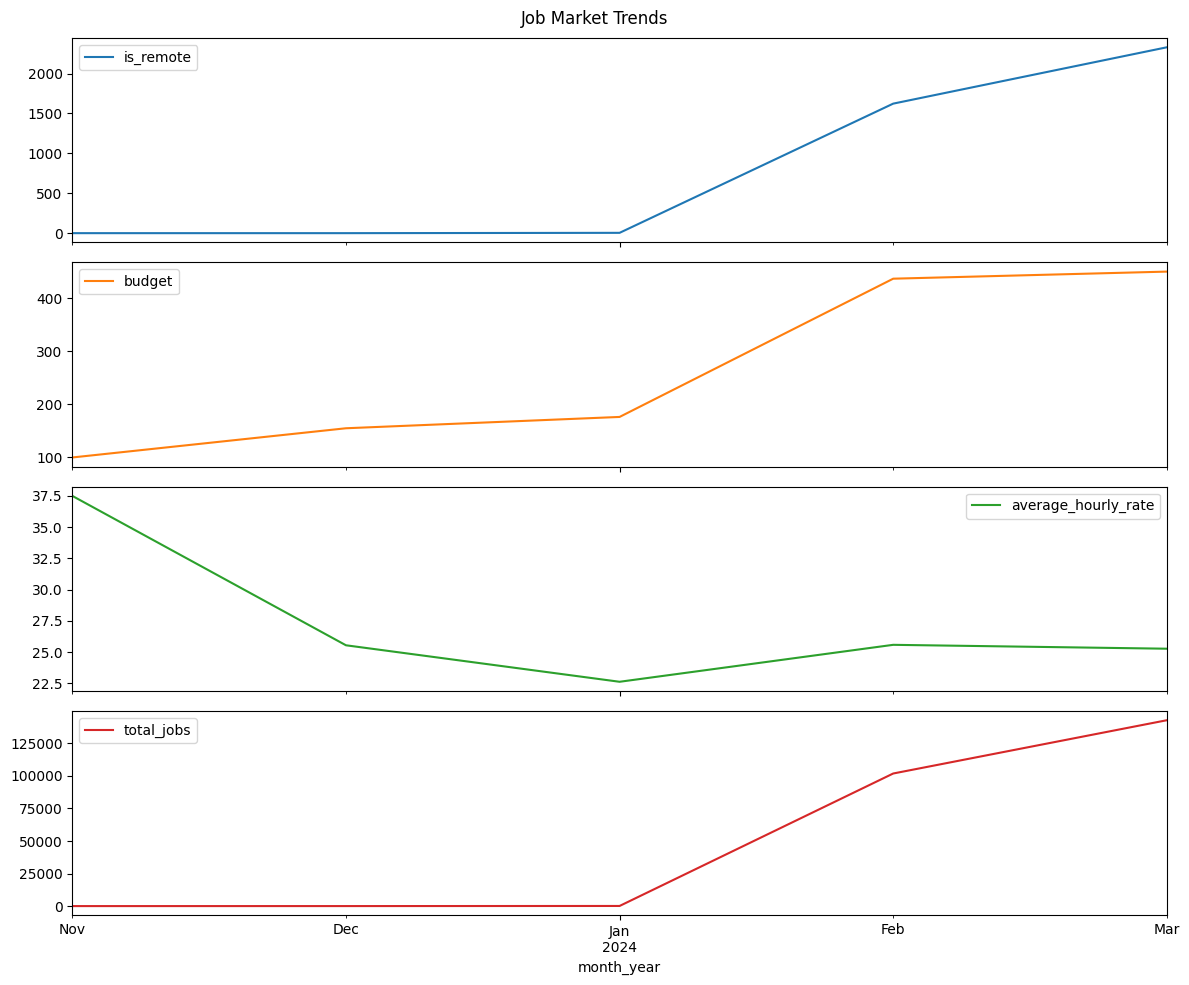

In [146]:
monthly_data.plot(subplots=True, figsize=(12, 10), title="Job Market Trends")
plt.tight_layout()
plt.show()

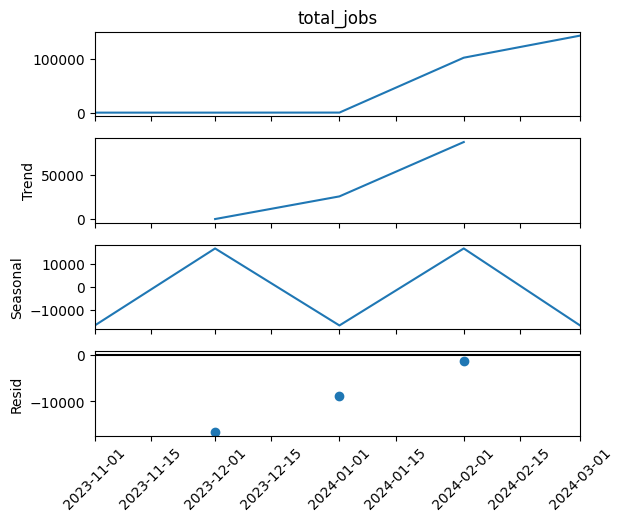

In [147]:
# Decompose the time series for total jobs
decomposition = seasonal_decompose(monthly_data['total_jobs'], model='additive', period=2)
decomposition.plot()
plt.xticks(rotation=45)
plt.show()

In [148]:
# ARIMA model for total jobs
arima_model = ARIMA(monthly_data['total_jobs'], order=(1, 1, 1))
arima_result = arima_model.fit()

In [150]:
# Predict future values
future_steps = 12
forecast_arima = arima_result.forecast(steps=future_steps)
forecast_arima.index = pd.date_range(start=monthly_data.index[-1], periods=future_steps + 1, freq='M')[1:]

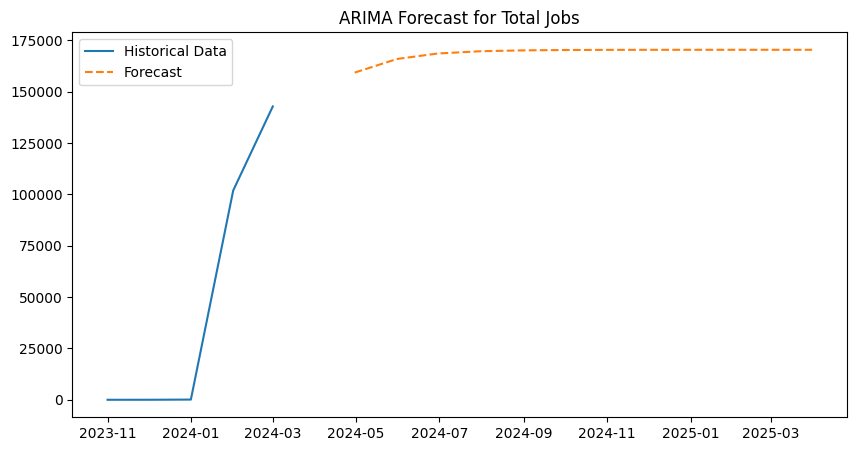

In [151]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_data['total_jobs'], label='Historical Data')
plt.plot(forecast_arima, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast for Total Jobs')
plt.legend()
plt.show()

In [166]:
df.to_csv('final-File.csv', index=False)